PROBABILITY OF DEFAULT CREDIT RISK DEVELOPMENT using Kaggle Competition Data
data set - https://www.kaggle.com/c/GiveMeSomeCredit
Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. Here we have started such development of PD model, absolutely from a beginner level and have explored the data widely to come up with a conclusive data which fits best for the model and have developed the model using XGBoost. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv(r'C:\Users\SHREYA\OneDrive\Desktop\cs-training.csv').drop(['Unnamed: 0'],axis=1)

test = pd.read_csv(r'C:\Users\SHREYA\OneDrive\Desktop\cs-test.csv').drop(['Unnamed: 0'],axis=1)


In [4]:
train.shape

(150000, 11)

In [5]:
test.shape

(101503, 11)

In [6]:
train_redup = train.drop_duplicates() #storing duplicates in a df

In [7]:
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)#checking % missing values using a function

In [8]:
findMiss(train_redup) #returns the % missing values in train_redup df


SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [9]:
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [10]:
train_redup.groupby(['NumberOfDependents']).size() #looking for the size of data

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [11]:
#creating subset of dataframe and filling missing values of no of depend and monthly income
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [12]:
#filling missing values with zero
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

<ipython-input-12-6a713ee960e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
<ipython-input-12-6a713ee960e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [13]:
findMiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [14]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [15]:
fam_nmiss['MonthlyIncome'].agg(['mean','median','min']) #hence not ideal

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [16]:
fam_nmiss['MonthlyIncome'].agg(['max']) #outliers are present
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median()) #filling missing values

<ipython-input-16-d4f94639ff2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median()) #filling missing values


In [17]:
findMiss(fam_nmiss) #now there are no missing values

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [18]:
#combining both together
filled_train = fam_nmiss.append(fam_miss)
filled_train.shape #total no.of records after filling missing data
findMiss(filled_train) #shows no missing values

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [19]:
filled_train.head() #analysing the data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [20]:
#finding proportion of defaulter and non defaulter & converting it into percentage
round(filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]*100,2)

SeriousDlqin2yrs
0    93.3
1     6.7
dtype: float64

In [21]:
#since the data is highly imbalanced the model will be biased so let's evaluate the variables
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [22]:
#dropping values>10 from col RevolvingUtilizationOfUnsecuredLines as ideal range is 0-1.
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10]).describe()
util_dropped=filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].index)
util_dropped.shape

(149150, 11)

c:\Users\SHREYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

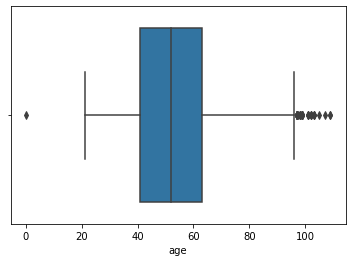

In [23]:
#checking for outliers in col age
sns.boxplot(util_dropped['age']) 

In [24]:
util_dropped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size() 
#shows that there are some misoccurrences or error since no of times has jumped directly to 96 after 13

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [25]:
util_dropped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size() 
#same error

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [26]:
util_dropped.groupby(['NumberOfTimes90DaysLate']).size() 
#same error

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [27]:
#finding out the no of defaulters who are 96>=  days late
util_dropped[util_dropped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()
#there are significant amt of defaulters henc the data can't be simply dropped
#can treat the outlier value by bringing them close to the last nearby value thro winsorizing


SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [28]:
#evaluating next variable DebtRatio
util_dropped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

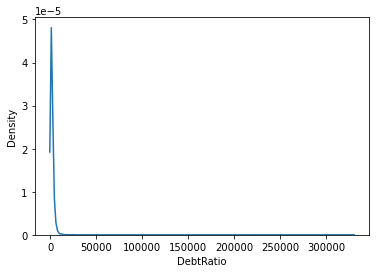

In [29]:
#visualizing col DebtRatio
sns.kdeplot(util_dropped['DebtRatio'])

In [37]:
#finding the proportions how DebtRatio is distributed
#shows the people with very high liabilities than asset
util_dropped[util_dropped['DebtRatio']>3500]['SeriousDlqin2yrs'].describe()
#analyzing defaulters under differeent liabilities range
util_dropped[util_dropped['DebtRatio']>3000].groupby(['SeriousDlqin2yrs']).size()
util_dropped[util_dropped['DebtRatio']>5000].groupby(['SeriousDlqin2yrs']).size()
#shows that less the debt ratio less are defaulters

SeriousDlqin2yrs
0    1366
1     111
dtype: int64

In [38]:
#considering 3492 as threshold & checking how many monthly income entries are zero in col SeriousDlqin2yrs
temp = util_dropped[(util_dropped['DebtRatio']>3492)&(util_dropped['SeriousDlqin2yrs']==util_dropped['MonthlyIncome'])]

In [39]:
temp.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
326,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
844,0,0.734284,45,0,11311.0,0.0,6,0,2,1,0.0
3370,0,1.000000,45,0,9260.0,0.0,7,0,4,0,4.0


In [40]:
#analyzing temp data further
temp.groupby(['SeriousDlqin2yrs']).size() #hence mostly non-defaulters have monthly income as zero.

SeriousDlqin2yrs
0    380
1      2
dtype: int64

In [44]:
#removing those 382 entries
dRatio = util_dropped.drop(util_dropped[(util_dropped['DebtRatio']>3492) & (util_dropped['SeriousDlqin2yrs']==util_dropped['MonthlyIncome'])].index)
dRatio.shape
dRatio.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [67]:
#creating model for the dataframe using xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report


In [55]:
model = XGBClassifier(tree_method = 'exact')


In [56]:
#creating to dataframes to train the model
x = dRatio.drop(['SeriousDlqin2yrs'],axis=1)
y = dRatio['SeriousDlqin2yrs']

In [57]:
#predicting the model
model.fit(x,y.values.ravel())
y_pred = model.predict(x)


In [61]:
#calculating accuracy
round(accuracy_score(y,y_pred)*100,2)

94.71

In [63]:
#confusion_matrix
cm = confusion_matrix(y,y_pred)

Text(33.0, 0.5, 'actuals')

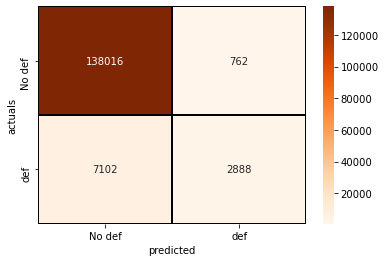

In [66]:
#heatmap
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [68]:
#classification report of model
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138778
           1       0.79      0.29      0.42      9990

    accuracy                           0.95    148768
   macro avg       0.87      0.64      0.70    148768
weighted avg       0.94      0.95      0.94    148768

